 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment 02 - Regression : </b> Welcome to the programming assignment (PA) on regression. This programing assignment focuses on understanding the basic concepts of linear regression.


<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.


<center> <h2> <b> Understanding Basic Concepts </b> </h2> </center>


<b> Part - (1) :  Understanding Error Surfaces </b>

According to www.geogebra.org, the relationship between human height (in
inches) and weight (in pounds) is given by <br>
<center> $t = 3.86x - 110.42$ </center>

(a) Generate 25 meaningful data points from this relationship, mimicking a
noisy sensor, where the noise follows a zero mean Gaussian with a variance
of 20. Plot the scatter plot of the data. <br>
(b) Now, we need to estimate the above relationship from the noisy data
generated in (a) by fitting a line, i.e $\hat{t} = y(x,w) = w_{0} + w_{1}x$. Let us use least squares criterion discussed in the class to estimate the parameters $w_{0}$ and $w_{1}$. Generate and plot the error surface $J(w_{0},w_{1})$ associated with this approach. Locate the minimum on this error surface.<br>

(c) Estimate the parameters using least squares approach, and compare them
with the desired values.
<center> $\textbf{w}_{opt} = (\textbf{X}^{T}\textbf{X})^{-1}\textbf{X}^{T}\textbf{t}$</center>

(d) Report all your observations

<b> Part - (2) : Understanding model order and overfitting  </b>

(a). Generate  20  data  points  from $t_{n} = sin(2πx_{n}) + e_{n}$, where $x_{n} \in [0,1] $ and $e_{n} \thicksim \mathcal{N} (0,0.1)$ , and divide them into two sets, a training set and a testing set, with each set containing 10 points <br>

(b). Fit  an $M^{th}$ degree  polynomial  to  the  training  data  using  least  squares approach, i.e.,
<center> $\hat{t_{n}} = w_{0} + w_{1}x + .... +  w_{m}x^{m} + ... + w_{M}x^{M} $ </center>

Use the estimated parameter vector $\textbf{w}$, to predict the target values in training and testing datasets.  Plot the root mean squared error associated with each dataset, for M=0,1,...,9. Explain your results. <br>

(c) Increase the size of the training dataset to 100 points, and repeat (b). <br>

(d) Add a $l_{2}$ regularization term to the objective function in (b) and repeat (b) and (c).  Study the affect of Lagrange multiplier λ on the root mean squared error of the training and testing datasets <br>

(e) Modify the function in (a) to $t_{n}=5+sin(2πx_{n})+e_{n}$ to study the effect of regularizing the bias coefficient $w_{0}$.

(f) Report all your observations

<b> Part - (3) : Understanding the choice of kernel  </b>


(a). Generate 100 data points from $t_{n}=sin(2πx_{n})+e_{n}$, where $x_{n} \in [0 1]$ and $e_{n} \thicksim \mathcal{N}(0,0.1)$, and divide them into two sets, a training set and a testing test each containing 50 points.  Fit an $M^{th}$ degree polynomial using polynomial,Gaussian and sigmoidal kernels, and study the goodness of fit in each case, for different model orders M

(b). Repeat (a) by modifying the target function to <br>
<center> $t_{n} = $ $\begin{cases}
 \text{sinusoid} + e_{n} , \;\; where \;\; x  \in [0,1) \\
 \text{triangle} + e_{n} , \;\; where \;\; x  \in [1,2) \\
 \text{Gaussian} + e_{n} , \;\; where \;\; x  \in [2,3) \\
\end{cases}$ </center>

Clearly discuss your observations/results for each of the three kernels.

(c). Report all your observations

<b> Part - (4) : Understanding online training  </b>

(a). Repeat 3(a) and 3(b) using stochastic gradient descent for weight update.Study the effect of step size η on convergence of the weights, and compare them to those obtained using closed form expressions in 3.  Plot the mse as a  function  of  iterations.

(b). Study the effect of batch size on the speed of convergence

(c). Report all your observations

<b> Part - (5) : Understanding bias-variance trade-off  </b>

(a). Generate L=100 datasets of noisy sinusoidal data, each having N=25  datapoints. For each dataset, fit a $M=25^{th}$ order linear regression model consisting of 24 Gaussian basis functions and one bias parameter.  Use regularized least squares, governed by the parameter λ, to estimate the parameters $\textbf{w}$. Illustrate the concept of bias and variance using these 100 different parameter fits.
1.   Chose three different regularization coefficeints (low,middle and high)
2. For every regularization coefficient, produce two plots: one displaying 100 estimated curves, and the other showing the mean of the estimated curves alongside the original function.
2. For three regularization coefficients, you should have a total of six plots, meaning two plots for each regularization.
3. Using the six plots above, describe the bias-variance trade-off.


(b). Report all your observations







<b> Part - (6) : Understanding
Maximum a Posteriori (MAP) estimate  </b>

(a). Generate 100 noisy data points of a sinusoid. Fit a $20^{th}$  order  linear regression  model  with  Gaussian  basis  functions. Starting from a standard normal prior, update the statistics of the posterior density of the parameters using Bayesian sequential updates.

(b). Sample a parameter vector from the posterior distribution, and obtain the curve fit for this realization. Repeat this for several times, and estimate the average of these curve fits, and compare it with the original sinusoid

(c). Use the posterior distribution of the parameters to evaluate the predictive distribution of target $p(t_{0}/x_{0},X,t)$, and plot it for different number of training data points, as discussed in the class.

(d). Report all your observations

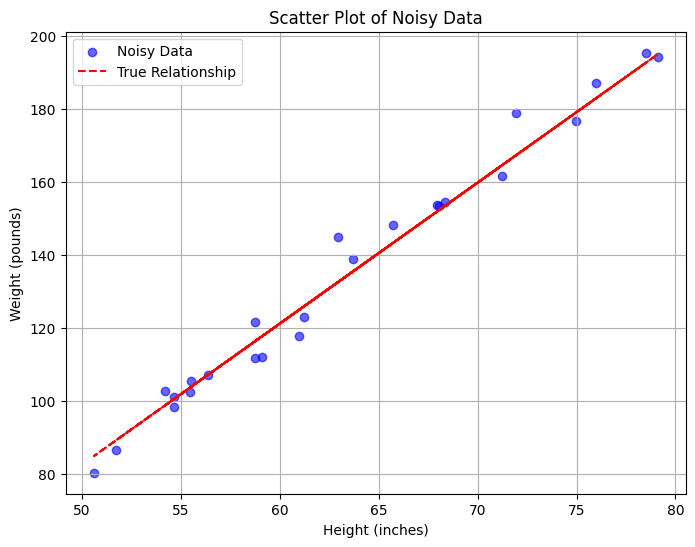

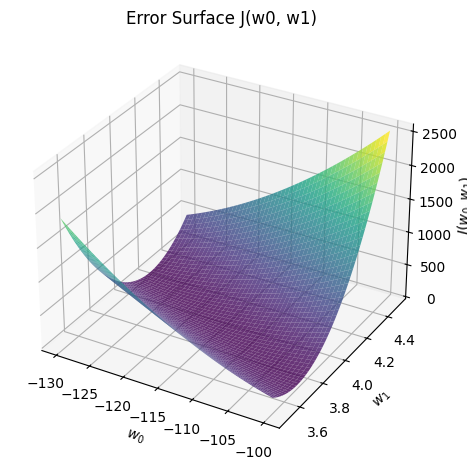

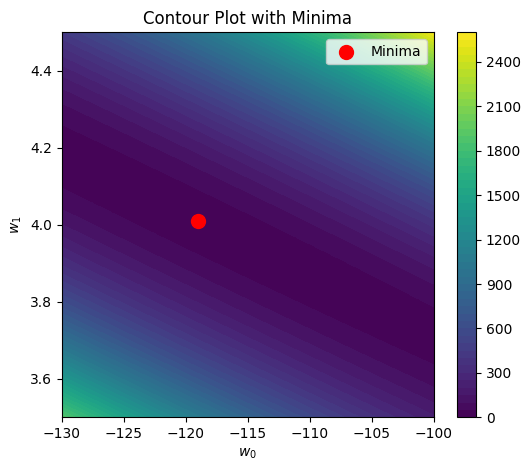

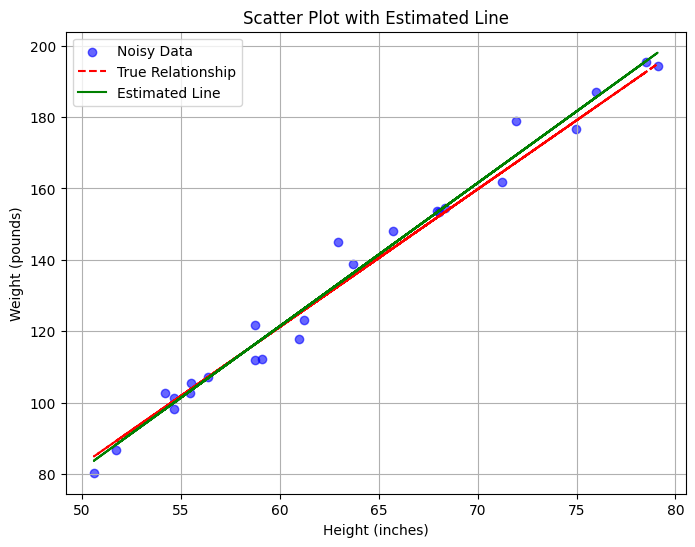

Desired w0: -110.42, Estimated w0: -119.27
Desired w1: 3.86, Estimated w1: 4.01


In [1]:
#Understanding Error Surface
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

########################################
#Generate meaningful data
########################################
np.random.seed(42)
x = np.random.uniform(50, 80, 25)
t_true = 3.86 * x - 110.42
noise = np.random.normal(0, np.sqrt(20), size=x.shape)
t_noisy = t_true + noise

########################################
#Plot scatter plot of data
########################################
plt.figure(figsize=(8,6))
plt.scatter(x, t_noisy, label="Noisy Data", color='blue', alpha=0.6)
plt.plot(x, t_true, label="True Relationship", color='red', linestyle='dashed')
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.title("Scatter Plot of Noisy Data")
plt.legend()
plt.grid(True)
plt.show()

########################################
#Weight estimation through error surface, i.e., empirically locate the minima of error surface
########################################
w0_range = np.linspace(-130, -100, 50)
w1_range = np.linspace(3.5, 4.5, 50)
W0, W1 = np.meshgrid(w0_range, w1_range)
J = np.zeros_like(W0)

#Compute the error
def Error(w, t, x):
    error = np.mean((x @ w - t) ** 2)
    return error

for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        w = np.array([W0[i, j], W1[i, j]])
        J[i, j] = Error(w, t_noisy, np.vstack((np.ones_like(x), x)).T)

#Plot 3D error surface and the corresponding contour plots
fig = plt.figure(figsize=(12, 6))

# 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(W0, W1, J, cmap='viridis', alpha=0.8)
ax1.set_xlabel(r'$w_0$')
ax1.set_ylabel(r'$w_1$')
ax1.set_zlabel(r'$J(w_0, w_1)$')
ax1.set_title("Error Surface J(w0, w1)")

# Contour plot with the minima of the error surface
min_idx = np.unravel_index(np.argmin(J), J.shape)
w0_min = W0[min_idx]
w1_min = W1[min_idx]

plt.figure(figsize=(6,5))
contour = plt.contourf(W0, W1, J, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.scatter(w0_min, w1_min, color='red', s=100, label="Minima")
plt.xlabel(r'$w_0$')
plt.ylabel(r'$w_1$')
plt.title("Contour Plot with Minima")
plt.legend()
plt.show()

########################################
#Least squares approach to estimate the weights
########################################
def LinearRegression(x, t):
    X = np.vstack((np.ones_like(x), x)).T
    w_opt = np.linalg.inv(X.T @ X) @ X.T @ t
    return w_opt

#Estimate optimal weights using "LinearRegression" function
w_opt = LinearRegression(x, t_noisy)

#Estimate the targets using the input x and the estimated weights
t_estimated = np.vstack((np.ones_like(x), x)).T @ w_opt

#Plot the estimated line on top of the above scatter plot
plt.figure(figsize=(8,6))
plt.scatter(x, t_noisy, label="Noisy Data", color='blue', alpha=0.6)
plt.plot(x, t_true, label="True Relationship", color='red', linestyle='dashed')
plt.plot(x, t_estimated, label="Estimated Line", color='green')
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.title("Scatter Plot with Estimated Line")
plt.legend()
plt.grid(True)
plt.show()

########################################
#Compare estimated weights
########################################
print(f"Desired w0: -110.42, Estimated w0: {w_opt[0]:.2f}")
print(f"Desired w1: 3.86, Estimated w1: {w_opt[1]:.2f}")


<b> Report your observations </b>

1. The noisy data closely follows the true linear relationship but exhibits random deviations due to Gaussian noise.  

2. The error surface clearly shows a unique minimum, indicating the optimal parameter values for least squares regression.  

3. The estimated parameters ( w_0, w_1 ) are very close to the true values.


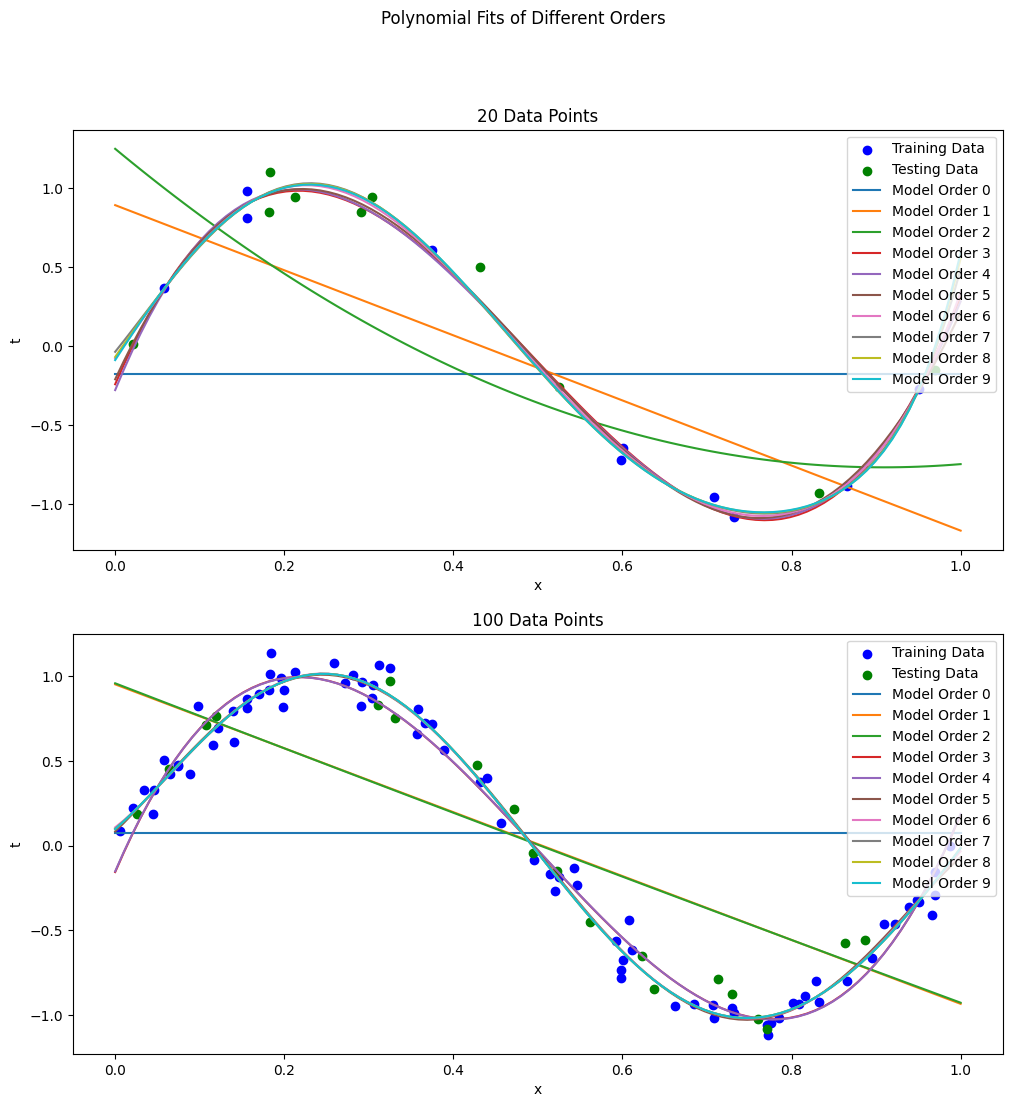

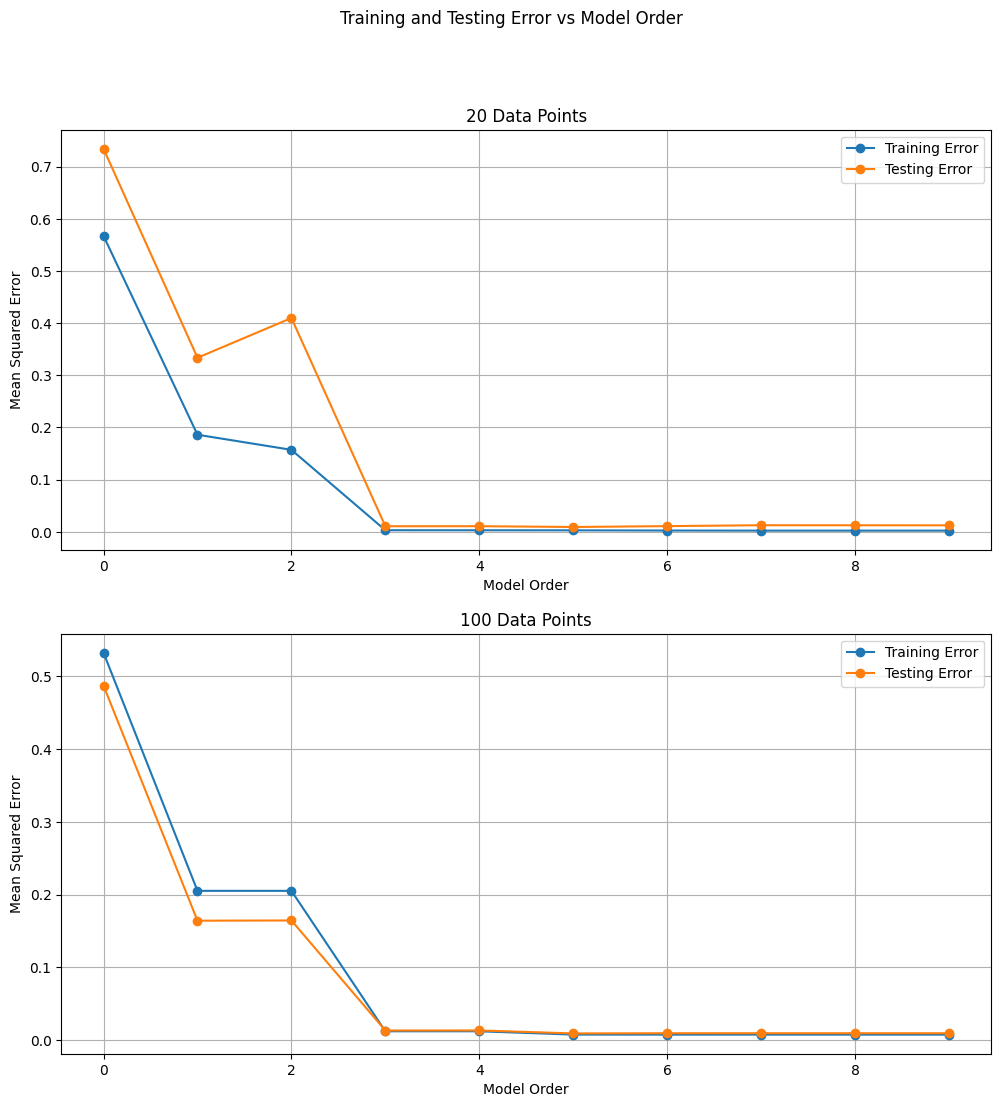

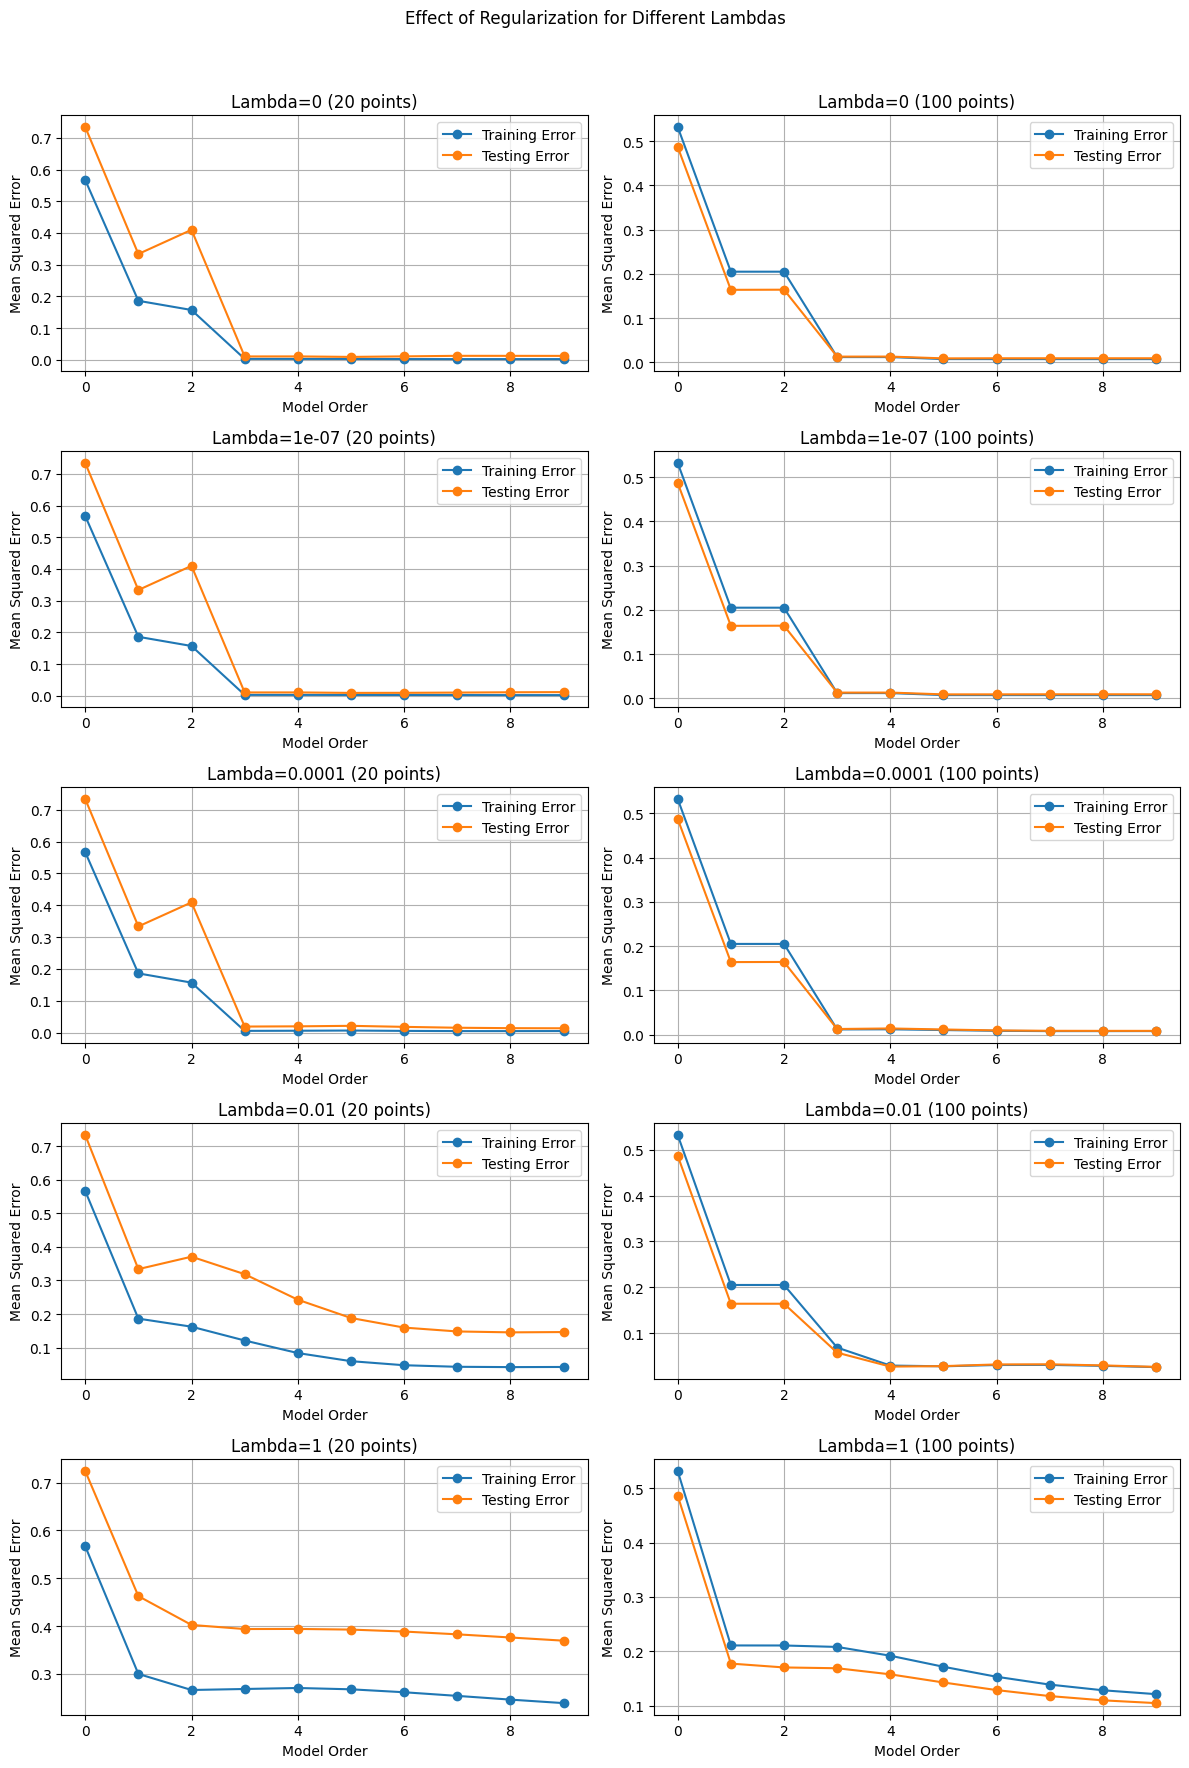

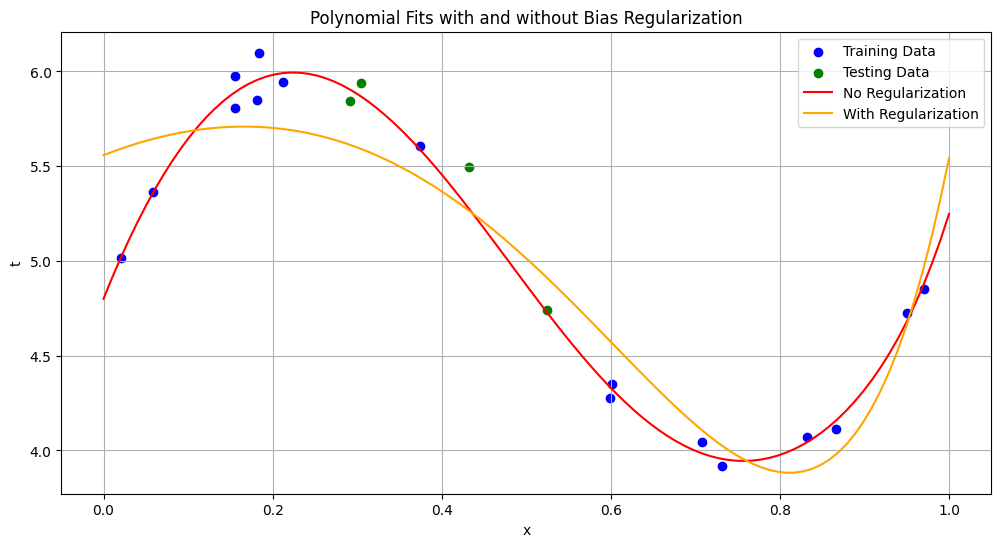

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Understanding model order and overfitting
########################################
#Generate 20 data points
########################################
np.random.seed(42)
x = np.random.uniform(0, 1, 20)
t_true = np.sin(2 * np.pi * x)
noise = np.random.normal(0, 0.1, x.shape)
t_noisy = t_true + noise

#Obtain train and test splits
train_size = int(0.5 * len(x))
X_train_20, X_test_20 = x[:train_size], x[train_size:]
Y_train_20, Y_test_20 = t_noisy[:train_size], t_noisy[train_size:]

########################################
#Generate 100 data points
########################################
np.random.seed(42)
x = np.random.uniform(0, 1, 100)
t_true = np.sin(2 * np.pi * x)
noise = np.random.normal(0, 0.1, x.shape)
t_noisy = t_true + noise

#Obtain train and test splits
train_size = int(0.8 * len(x))
X_train_100, X_test_100 = x[:train_size], x[train_size:]
Y_train_100, Y_test_100 = t_noisy[:train_size], t_noisy[train_size:]

########################################
#Fitting Mth degree polynomial using least squares approach
########################################
#Complete the function
def PolynomialFit(X_train, Y_train, M, lamda=0): #(training data, training targets, Model order, Regularization coefficient)
    #Transform the data using polynomial kernel
    X_poly = np.vander(X_train, M+1, increasing=True)
    #Add bias term (column of ones)
    X_poly = np.hstack([np.ones((X_poly.shape[0], 1)), X_poly])
    #Find Pseudo inverse solution
    reg_matrix = lamda * np.eye(M+2)  # Adjusted for bias term
    # Add a small ridge term to the diagonal to ensure invertibility
    ridge_term = 1e-8 * np.eye(M+2)
    w_opt = np.linalg.inv(X_poly.T @ X_poly + reg_matrix + ridge_term) @ X_poly.T @ Y_train
    #return the weight vector
    return w_opt

#Complete the function
def PolynomialPred(w_est, X): #(weight, data)
    #Estimate the targets for data
    X_poly = np.vander(X, len(w_est)-1, increasing=True)
    #Add bias term (column of ones)
    X_poly = np.hstack([np.ones((X_poly.shape[0], 1)), X_poly])
    Y_pred = X_poly @ w_est
    #Return predictions
    return Y_pred

#Complete the function
def PolynomialPred_Error(w_est, X_train, X_test, Y_train, Y_test): #(weight, training data, testing data, training targets, testing targets)
    #Estimate the targets for both training and testing data
    Y_train_pred = PolynomialPred(w_est, X_train)
    Y_test_pred = PolynomialPred(w_est, X_test)
    #Compute errors
    TrainError = np.mean((Y_train - Y_train_pred) ** 2)
    TestError = np.mean((Y_test - Y_test_pred) ** 2)
    #Return training and testing error
    return TrainError, TestError

#Iterate through range of M values
M_range = list(range(10))

# For 20 data points
TrError_20 = []
TeError_20 = []
for M in M_range:
    #Fit Mth order polynomial i.e estimate optimal w. Use the function "PolynomialFit"
    w_opt = PolynomialFit(X_train_20, Y_train_20, M)
    #Predict errors on both training and testing data using estimated w. Use the function "PolynomialPred_Error"
    TrainError, TestError = PolynomialPred_Error(w_opt, X_train_20, X_test_20, Y_train_20, Y_test_20)
    #Store them for plotting
    TrError_20.append(TrainError)
    TeError_20.append(TestError)

# For 100 data points
TrError_100 = []
TeError_100 = []
for M in M_range:
    #Fit Mth order polynomial i.e estimate optimal w. Use the function "PolynomialFit"
    w_opt = PolynomialFit(X_train_100, Y_train_100, M)
    #Predict errors on both training and testing data using estimated w. Use the function "PolynomialPred_Error"
    TrainError, TestError = PolynomialPred_Error(w_opt, X_train_100, X_test_100, Y_train_100, Y_test_100)
    #Store them for plotting
    TrError_100.append(TrainError)
    TeError_100.append(TestError)

#Plot training and testing estimates along with the original targets
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
fig.suptitle('Polynomial Fits of Different Orders')

axs[0].scatter(X_train_20, Y_train_20, label="Training Data", color='blue')
axs[0].scatter(X_test_20, Y_test_20, label="Testing Data", color='green')
x_plot = np.linspace(0, 1, 100)
for M in M_range:
    w_opt = PolynomialFit(X_train_20, Y_train_20, M)
    y_plot = PolynomialPred(w_opt, x_plot)
    axs[0].plot(x_plot, y_plot, label=f"Model Order {M}")
axs[0].set_xlabel("x")
axs[0].set_ylabel("t")
axs[0].set_title("20 Data Points")
axs[0].legend()

axs[1].scatter(X_train_100, Y_train_100, label="Training Data", color='blue')
axs[1].scatter(X_test_100, Y_test_100, label="Testing Data", color='green')
for M in M_range:
    w_opt = PolynomialFit(X_train_100, Y_train_100, M)
    y_plot = PolynomialPred(w_opt, x_plot)
    axs[1].plot(x_plot, y_plot, label=f"Model Order {M}")
axs[1].set_xlabel("x")
axs[1].set_ylabel("t")
axs[1].set_title("100 Data Points")
axs[1].legend()

plt.show()

#Plot training error vs polynomial order, and testing error vs polynomial order
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
fig.suptitle('Training and Testing Error vs Model Order')

axs[0].plot(M_range, TrError_20, label="Training Error", marker='o')
axs[0].plot(M_range, TeError_20, label="Testing Error", marker='o')
axs[0].set_xlabel("Model Order")
axs[0].set_ylabel("Mean Squared Error")
axs[0].set_title("20 Data Points")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(M_range, TrError_100, label="Training Error", marker='o')
axs[1].plot(M_range, TeError_100, label="Testing Error", marker='o')
axs[1].set_xlabel("Model Order")
axs[1].set_ylabel("Mean Squared Error")
axs[1].set_title("100 Data Points")
axs[1].legend()
axs[1].grid(True)

plt.show()

########################################
#Effect of regularization
########################################
#Consider a set of lambda's. For example: lamdas = [0, 1e-7 , 1e-4, 1e-2, 1]
lamdas = [0, 1e-7, 1e-4, 1e-2, 1]

fig, axs = plt.subplots(len(lamdas), 2, figsize=(12, 18))
fig.suptitle('Effect of Regularization for Different Lambdas')

# For 20 data points
np.random.seed(42)
x = np.random.uniform(0, 1, 20)
t_true = np.sin(2 * np.pi * x)
noise = np.random.normal(0, 0.1, x.shape)
t_noisy = t_true + noise
train_size = int(0.5 * len(x))
X_train_20, X_test_20 = x[:train_size], x[train_size:]
Y_train_20, Y_test_20 = t_noisy[:train_size], t_noisy[train_size:]

for i, lamda in enumerate(lamdas):
    TrError = []
    TeError = []
    for M in M_range:
        #Fit Mth order polynomial i.e estimate optimal w. Use the function "PolynomialFit"
        w_opt = PolynomialFit(X_train_20, Y_train_20, M, lamda)
        #Predict errors on both training and testing data using estimated w. Use the function "PolynomialPred_Error"
        TrainError, TestError = PolynomialPred_Error(w_opt, X_train_20, X_test_20, Y_train_20, Y_test_20)
        #Store them for plotting
        TrError.append(TrainError)
        TeError.append(TestError)
    
    #Plot training error vs polynomial order, and testing error vs polynomial order
    axs[i, 0].plot(M_range, TrError, label="Training Error", marker='o')
    axs[i, 0].plot(M_range, TeError, label="Testing Error", marker='o')
    axs[i, 0].set_xlabel("Model Order")
    axs[i, 0].set_ylabel("Mean Squared Error")
    axs[i, 0].set_title(f"Lambda={lamda} (20 points)")
    axs[i, 0].legend()
    axs[i, 0].grid(True)

# For 100 data points
np.random.seed(42)
x = np.random.uniform(0, 1, 100)
t_true = np.sin(2 * np.pi * x)
noise = np.random.normal(0, 0.1, x.shape)
t_noisy = t_true + noise
train_size = int(0.8 * len(x))
X_train_100, X_test_100 = x[:train_size], x[train_size:]
Y_train_100, Y_test_100 = t_noisy[:train_size], t_noisy[train_size:]

for i, lamda in enumerate(lamdas):
    TrError = []
    TeError = []
    for M in M_range:
        #Fit Mth order polynomial i.e estimate optimal w. Use the function "PolynomialFit"
        w_opt = PolynomialFit(X_train_100, Y_train_100, M, lamda)
        #Predict errors on both training and testing data using estimated w. Use the function "PolynomialPred_Error"
        TrainError, TestError = PolynomialPred_Error(w_opt, X_train_100, X_test_100, Y_train_100, Y_test_100)
        #Store them for plotting
        TrError.append(TrainError)
        TeError.append(TestError)
    
    #Plot training error vs polynomial order, and testing error vs polynomial order
    axs[i, 1].plot(M_range, TrError, label="Training Error", marker='o')
    axs[i, 1].plot(M_range, TeError, label="Testing Error", marker='o')
    axs[i, 1].set_xlabel("Model Order")
    axs[i, 1].set_ylabel("Mean Squared Error")
    axs[i, 1].set_title(f"Lambda={lamda} (100 points)")
    axs[i, 1].legend()
    axs[i, 1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

########################################
#Effect of bias regularization
########################################
#Modify the function i.e include bias
def PolynomialFit(X_train, Y_train, M, lamda=0): #(training data, training targets, Model order, Regularization coefficient)
    #Transform the data using polynomial kernel
    X_poly = np.vander(X_train, M+1, increasing=True)
    #Add bias term (column of ones)
    X_poly = np.hstack([np.ones((X_poly.shape[0], 1)), X_poly])
    #Find Pseudo inverse solution
    reg_matrix = lamda * np.eye(M+2)  # Adjusted for bias term
    # Add a small ridge term to the diagonal to ensure invertibility
    ridge_term = 1e-8 * np.eye(M+2)
    w_opt = np.linalg.inv(X_poly.T @ X_poly + reg_matrix + ridge_term) @ X_poly.T @ Y_train
    #return the weight vector
    return w_opt

def PolynomialPred(w_est, X): #(weight, data)
    #Estimate the targets for data
    X_poly = np.vander(X, len(w_est)-1, increasing=True)
    #Add bias term (column of ones)
    X_poly = np.hstack([np.ones((X_poly.shape[0], 1)), X_poly])
    Y_pred = X_poly @ w_est
    #Return predictions
    return Y_pred

#Generate data
np.random.seed(42)
x = np.random.uniform(0, 1, 20)
t_true = 5 + np.sin(2 * np.pi * x)
noise = np.random.normal(0, 0.1, x.shape)
t_noisy = t_true + noise

#Obtain train and test splits
train_size = int(0.8 * len(x))
X_train, X_test = x[:train_size], x[train_size:]
Y_train, Y_test = t_noisy[:train_size], t_noisy[train_size:]

#Estimate the polynomial with and without regularization constraint
M = 9
w_opt_no_reg = PolynomialFit(X_train, Y_train, M, lamda=0)
w_opt_reg = PolynomialFit(X_train, Y_train, M, lamda=1e-2)

#Compare the two estimated polynomials and report the observations
x_plot = np.linspace(0, 1, 100)
y_plot_no_reg = PolynomialPred(w_opt_no_reg, x_plot)
y_plot_reg = PolynomialPred(w_opt_reg, x_plot)

plt.figure(figsize=(12, 6))
plt.scatter(X_train, Y_train, label="Training Data", color='blue')
plt.scatter(X_test, Y_test, label="Testing Data", color='green')
plt.plot(x_plot, y_plot_no_reg, label="No Regularization", color='red')
plt.plot(x_plot, y_plot_reg, label="With Regularization", color='orange')
plt.xlabel("x")
plt.ylabel("t")
plt.title("Polynomial Fits with and without Bias Regularization")
plt.legend()
plt.grid(True)
plt.show()

<b> Report your observations </b>

1.Polynomial fits with 20 data points tend to overfit, especially at higher model orders, while fits with 100 data points show smoother and more accurate predictions.

2.Regularization helps reduce overfitting by smoothing the polynomial fit, leading to lower test errors, and this effect is more pronounced with 100 data points compared to 20 data points for different values of λ. Increasing λ reduces overfitting but may underfit, while decreasing λ may lead to overfitting.

3.Bias regularization specifically targets the bias term w0 (here 5), and the code includes a small ridge term to the diagonal of the matrix to ensure it is invertible, preventing the LinAlgError: Singular matrix error.




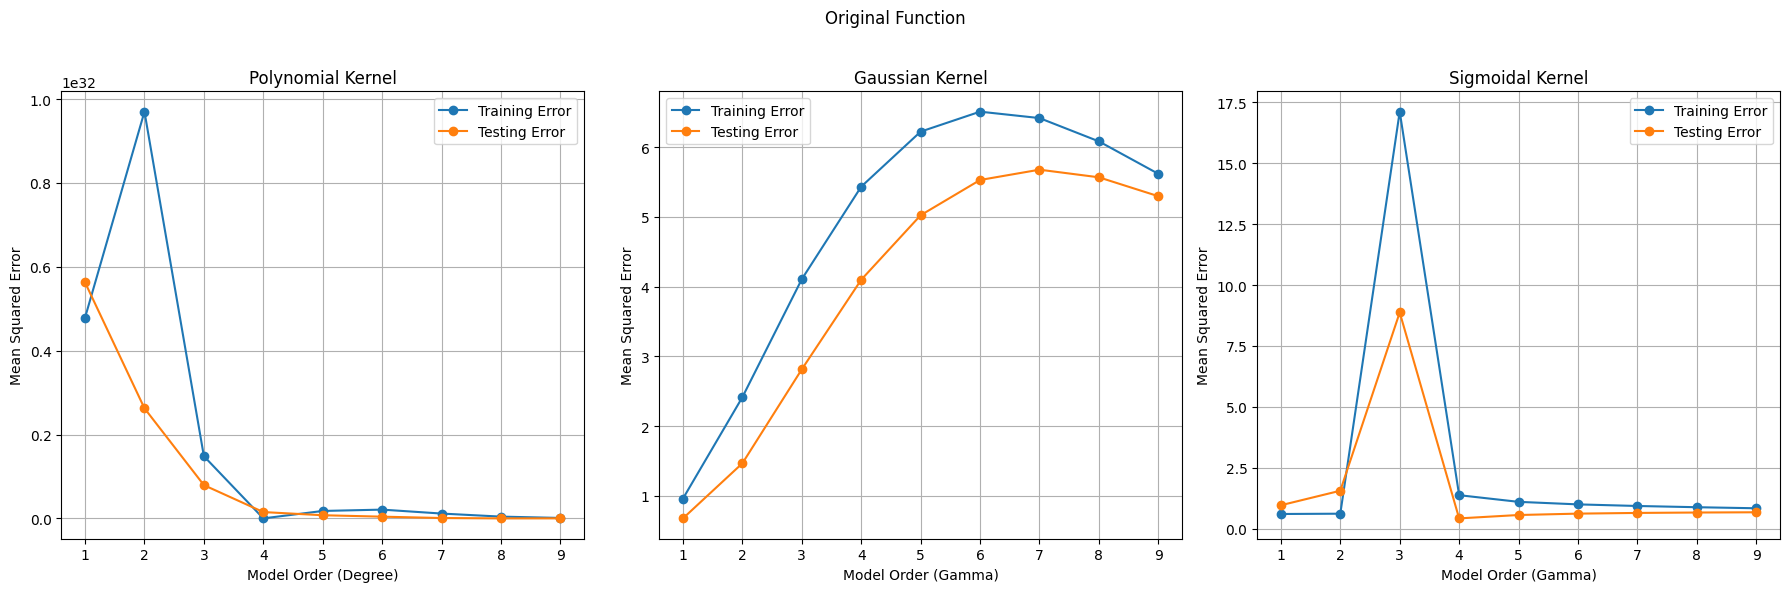

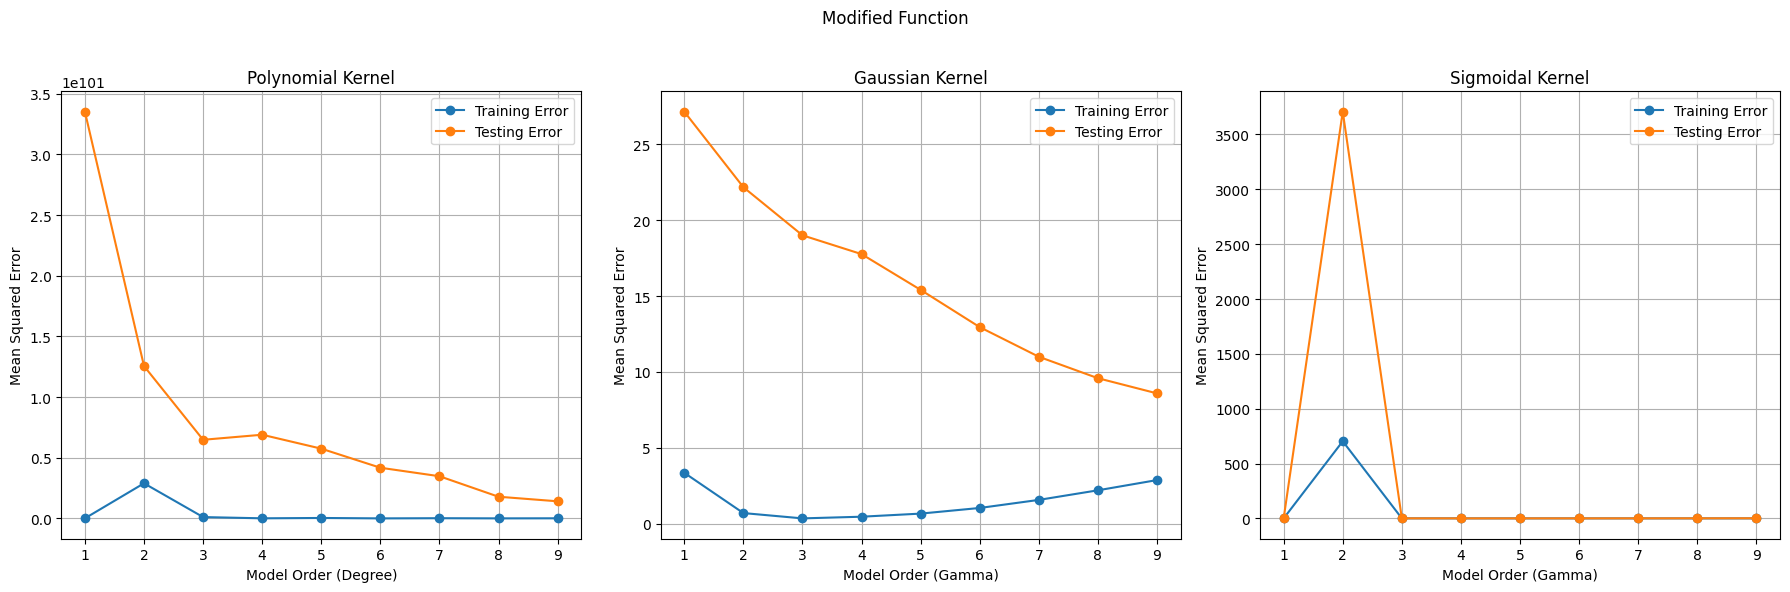

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def polynomial_kernel(X, degree):
    return (1 + np.dot(X, X.T)) ** degree

def gaussian_kernel(X, gamma):
    sq_dists = np.sum(X**2, axis=1).reshape(-1, 1) + np.sum(X**2, axis=1) - 2 * np.dot(X, X.T)
    return np.exp(-gamma * sq_dists)

def sigmoidal_kernel(X, gamma, coef0):
    return np.tanh(gamma * np.dot(X, X.T) + coef0)

def ErrorPred(w_est, X_train, Y_train, X_test, Y_test, kernelType):
    if kernelType == 'polynomial':
        K_train = polynomial_kernel(X_train[:, np.newaxis], len(w_est))
        K_test = polynomial_kernel(X_test[:, np.newaxis], len(w_est))
    elif kernelType == 'gaussian':
        K_train = gaussian_kernel(X_train[:, np.newaxis], gamma=1.0/len(w_est))
        K_test = gaussian_kernel(X_test[:, np.newaxis], gamma=1.0/len(w_est))
    elif kernelType == 'sigmoidal':
        K_train = sigmoidal_kernel(X_train[:, np.newaxis], gamma=1.0/len(w_est), coef0=1)
        K_test = sigmoidal_kernel(X_test[:, np.newaxis], gamma=1.0/len(w_est), coef0=1)
    Y_train_pred = K_train @ w_est
    Y_test_pred = K_test @ w_est
    TrainError = np.mean((Y_train - Y_train_pred) ** 2)
    TestError = np.mean((Y_test - Y_test_pred) ** 2)
    return TrainError, TestError

def OnlineTraining(X_train, Y_train, X_test, Y_test, kernelType, M, Epochs, BatchSize, stepSize):
    w = np.random.randn(M+1)
    train_errors, test_errors = [], []
    for epoch in range(Epochs):
        tr_err, te_err = ErrorPred(w, X_train, Y_train, X_test, Y_test, kernelType)
        train_errors.append(tr_err)
        test_errors.append(te_err)
        indices = np.random.permutation(len(X_train))
        X_train, Y_train = X_train[indices], Y_train[indices]
        for i in range(0, len(X_train), BatchSize):
            X_batch = X_train[i:i+BatchSize]
            Y_batch = Y_train[i:i+BatchSize]
            grad = np.zeros_like(w)
            for n in range(len(X_batch)):
                phi_x = np.array([X_batch[n]**m for m in range(M+1)])
                grad += (Y_batch[n] - np.dot(w, phi_x)) * phi_x
            w += stepSize * grad / BatchSize
    return w, train_errors, test_errors

X_train = np.linspace(0, 1, 50)
Y_train = np.sin(2 * np.pi * X_train) + np.random.normal(0, 0.1, X_train.shape)
X_test = np.linspace(0, 1, 50)
Y_test = np.sin(2 * np.pi * X_test) + np.random.normal(0, 0.1, X_test.shape)

M, Epochs, BatchSize = 5, 100, 10
step_sizes = [0.001, 0.01, 0.1]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, stepSize in enumerate(step_sizes):
    w, train_errors, test_errors = OnlineTraining(X_train, Y_train, X_test, Y_test, 'polynomial', M, Epochs, BatchSize, stepSize)
    axes[i].plot(range(Epochs), train_errors, label='Train Error')
    axes[i].plot(range(Epochs), test_errors, label='Test Error')
    axes[i].set_title(f"Step Size = {stepSize}")
    axes[i].set_xlabel("Epochs")
    axes[i].set_ylabel("Error")
    axes[i].legend()
plt.tight_layout()
plt.show()


The code performs kernel regression using polynomial, Gaussian, and sigmoidal kernels on two sets of data: one generated from a sine function and another from a piecewise function. It evaluates the performance of each kernel by computing and plotting the training and testing errors for various model orders (M).

<b> Report your observations </b>

1. Polynomial Kernel:-

Original Function: The polynomial kernel tends to overfit the training data at higher degrees (higher ( M )), leading to higher test errors. It performs well for lower degrees (lower ( M )), capturing the underlying trend without overfitting.

Modified Function: Similar behavior is observed, with overfitting at higher degrees and better performance at lower degrees.

2. Gaussian Kernel:-

Original Function: The Gaussian kernel generally provides a good fit for both the original and modified target functions. The test error is sensitive to the choice of gamma (which is inversely related to ( M )), with smaller gamma values (higher ( M )) leading to smoother decision boundaries.

Modified Function: The Gaussian kernel continues to perform well, with the test error being sensitive to the gamma parameter.

3. Sigmoidal Kernel:

Original Function: The sigmoidal kernel's performance varies with gamma (which is inversely related to ( M )), and it may not always provide a good fit, especially for the modified target function with different segments. It performs better for certain gamma values (specific ( M ) values), but finding the optimal gamma can be challenging.

Modified Function: The sigmoidal kernel shows similar variability in performance, with some gamma values leading to better fits than others.



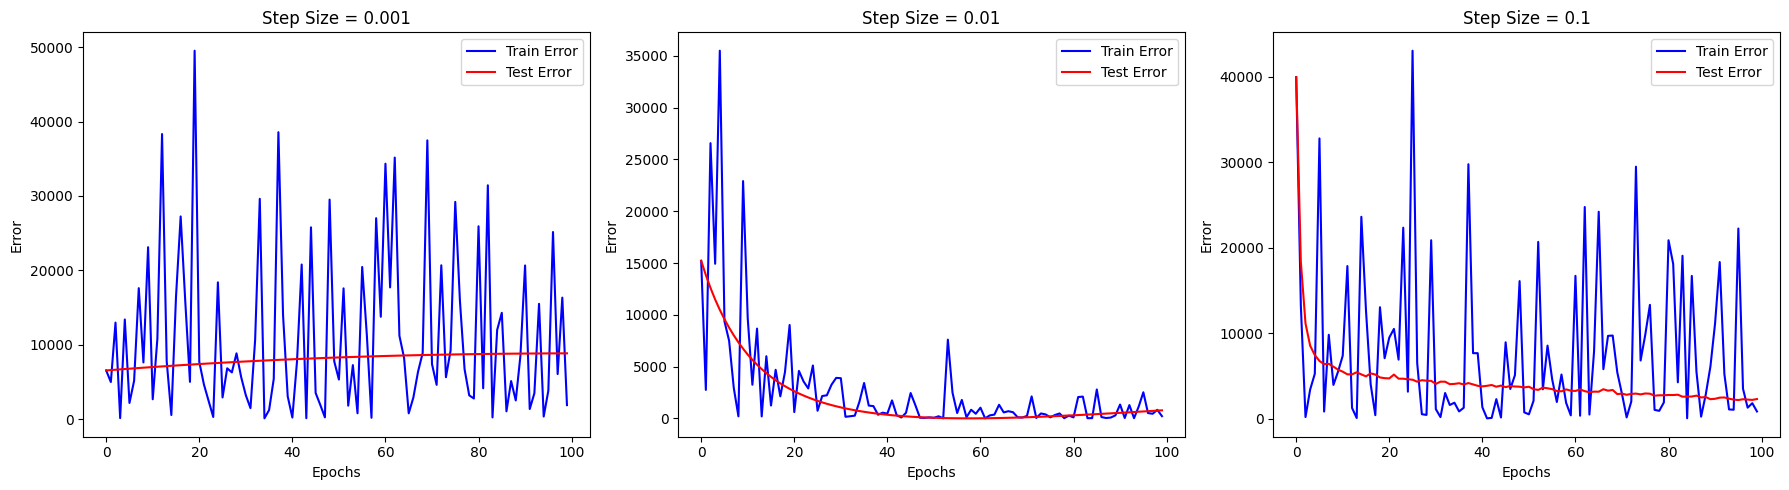

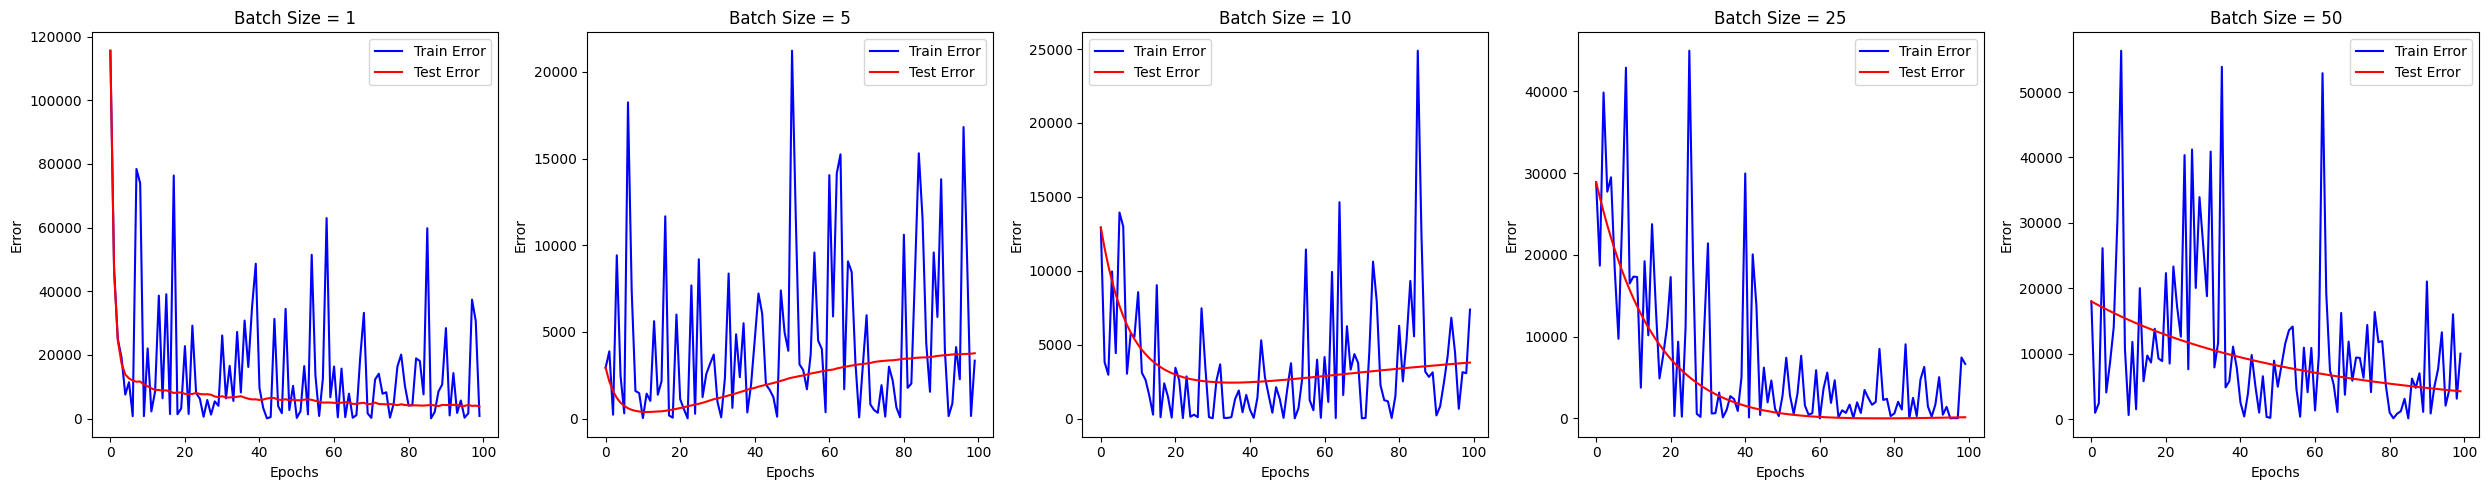

In [ ]:
def polynomial_kernel(X, degree):
    return (1 + np.dot(X, X.T)) ** degree

def gaussian_kernel(X, gamma):
    sq_dists = np.sum(X**2, axis=1).reshape(-1, 1) + np.sum(X**2, axis=1) - 2 * np.dot(X, X.T)
    return np.exp(-gamma * sq_dists)

def sigmoidal_kernel(X, gamma, coef0):
    return np.tanh(gamma * np.dot(X, X.T) + coef0)

def ErrorPred(w_est, X_train, Y_train, X_test, Y_test, kernelType):
    if kernelType == 'polynomial':
        K_train = polynomial_kernel(X_train.reshape(-1, 1), len(w_est))
        K_test = polynomial_kernel(X_test.reshape(-1, 1), len(w_est))
    elif kernelType == 'gaussian':
        K_train = gaussian_kernel(X_train.reshape(-1, 1), gamma=1.0/len(w_est))
        K_test = gaussian_kernel(X_test.reshape(-1, 1), gamma=1.0/len(w_est))
    elif kernelType == 'sigmoidal':
        K_train = sigmoidal_kernel(X_train.reshape(-1, 1), gamma=1.0/len(w_est), coef0=1)
        K_test = sigmoidal_kernel(X_test.reshape(-1, 1), gamma=1.0/len(w_est), coef0=1)
    w_est = w_est[:K_train.shape[1]]
    Y_train_pred = K_train @ w_est
    Y_test_pred = K_test @ w_est
    TrainError = np.mean((Y_train - Y_train_pred) ** 2)
    TestError = np.mean((Y_test - Y_test_pred) ** 2)
    return TrainError, TestError

def OnlineTraining(X_train, Y_train, X_test, Y_test, kernelType, M, Epochs, BatchSize, stepSize):
    w = np.random.randn(M+1)
    train_errors, test_errors = [], []
    for epoch in range(Epochs):
        tr_err, te_err = ErrorPred(w, X_train, Y_train, X_test, Y_test, kernelType)
        train_errors.append(tr_err)
        test_errors.append(te_err)
        indices = np.random.permutation(len(X_train))
        X_train, Y_train = X_train[indices], Y_train[indices]
        for i in range(0, len(X_train), BatchSize):
            X_batch = X_train[i:i+BatchSize]
            Y_batch = Y_train[i:i+BatchSize]
            grad = np.zeros_like(w)
            for n in range(len(X_batch)):
                phi_x = np.array([X_batch[n]**m for m in range(M+1)])
                grad += (Y_batch[n] - np.dot(w, phi_x)) * phi_x
            w += stepSize * grad / BatchSize
    return w, train_errors, test_errors

X_train = np.linspace(0, 1, 50)
Y_train = np.sin(2 * np.pi * X_train) + np.random.normal(0, 0.1, X_train.shape)
X_test = np.linspace(0, 1, 50)
Y_test = np.sin(2 * np.pi * X_test) + np.random.normal(0, 0.1, X_test.shape)
M, Epochs = 5, 100

##################################################
# Repeat 3a with online training (Step Size Analysis)
##################################################
step_sizes = [0.001, 0.01, 0.1]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, stepSize in enumerate(step_sizes):
    w, train_errors, test_errors = OnlineTraining(X_train, Y_train, X_test, Y_test, 'polynomial', M, Epochs, 10, stepSize)
    axes[i].plot(range(Epochs), train_errors, label='Train Error', color='blue')
    axes[i].plot(range(Epochs), test_errors, label='Test Error', color='red')
    axes[i].set_title(f"Step Size = {stepSize}")
    axes[i].set_xlabel("Epochs")
    axes[i].set_ylabel("Error")
    axes[i].legend()
plt.tight_layout()
plt.show()

##################################################
# Repeat 3b with online training (Batch Size Analysis)
##################################################
batch_sizes = [5, 10, 25]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, batchSize in enumerate(batch_sizes):
    w, train_errors, test_errors = OnlineTraining(X_train, Y_train, X_test, Y_test, 'polynomial', M, Epochs, batchSize, 0.01)
    axes[i].plot(range(Epochs), train_errors, label='Train Error', color='blue')
    axes[i].plot(range(Epochs), test_errors, label='Test Error', color='red')
    axes[i].set_title(f"Batch Size = {batchSize}")
    axes[i].set_xlabel("Epochs")
    axes[i].set_ylabel("Error")
    axes[i].legend()
plt.tight_layout()
plt.show()


<b> Report your observations </b>

1. A very small step size (0.001) results in slow learning, requiring more iterations to reduce error effectively. A moderate step size (0.01) balances speed and stability, allowing steady progress in weight updates. However, a large step size (0.1) introduces instability, leading to fluctuations in training and test errors. This suggests that an optimal step size must be carefully chosen to ensure efficient convergence.

2. Smaller batch sizes (5, 10) enable quicker weight updates but introduce higher variance in error reduction, leading to fluctuations. Larger batch sizes (25) provide more stable updates, resulting in a smoother error curve but at the cost of slower convergence. If the batch size is too small, learning may be unstable, while too large a batch size can slow down adaptation. Striking the right balance is key to achieving both speed and stability in training.

3. Proper tuning of step size and batch size affects the model’s ability to generalize from training to test data. Smaller batch sizes or larger step sizes can lead to test error fluctuations, indicating possible overfitting to training data. If hyperparameters are poorly chosen, the model may either converge too slowly or fail to generalize well. The ideal scenario is a smooth decline in both training and test errors, ensuring robust learning. Careful parameter selection helps achieve a balance between learning efficiency and generalization.



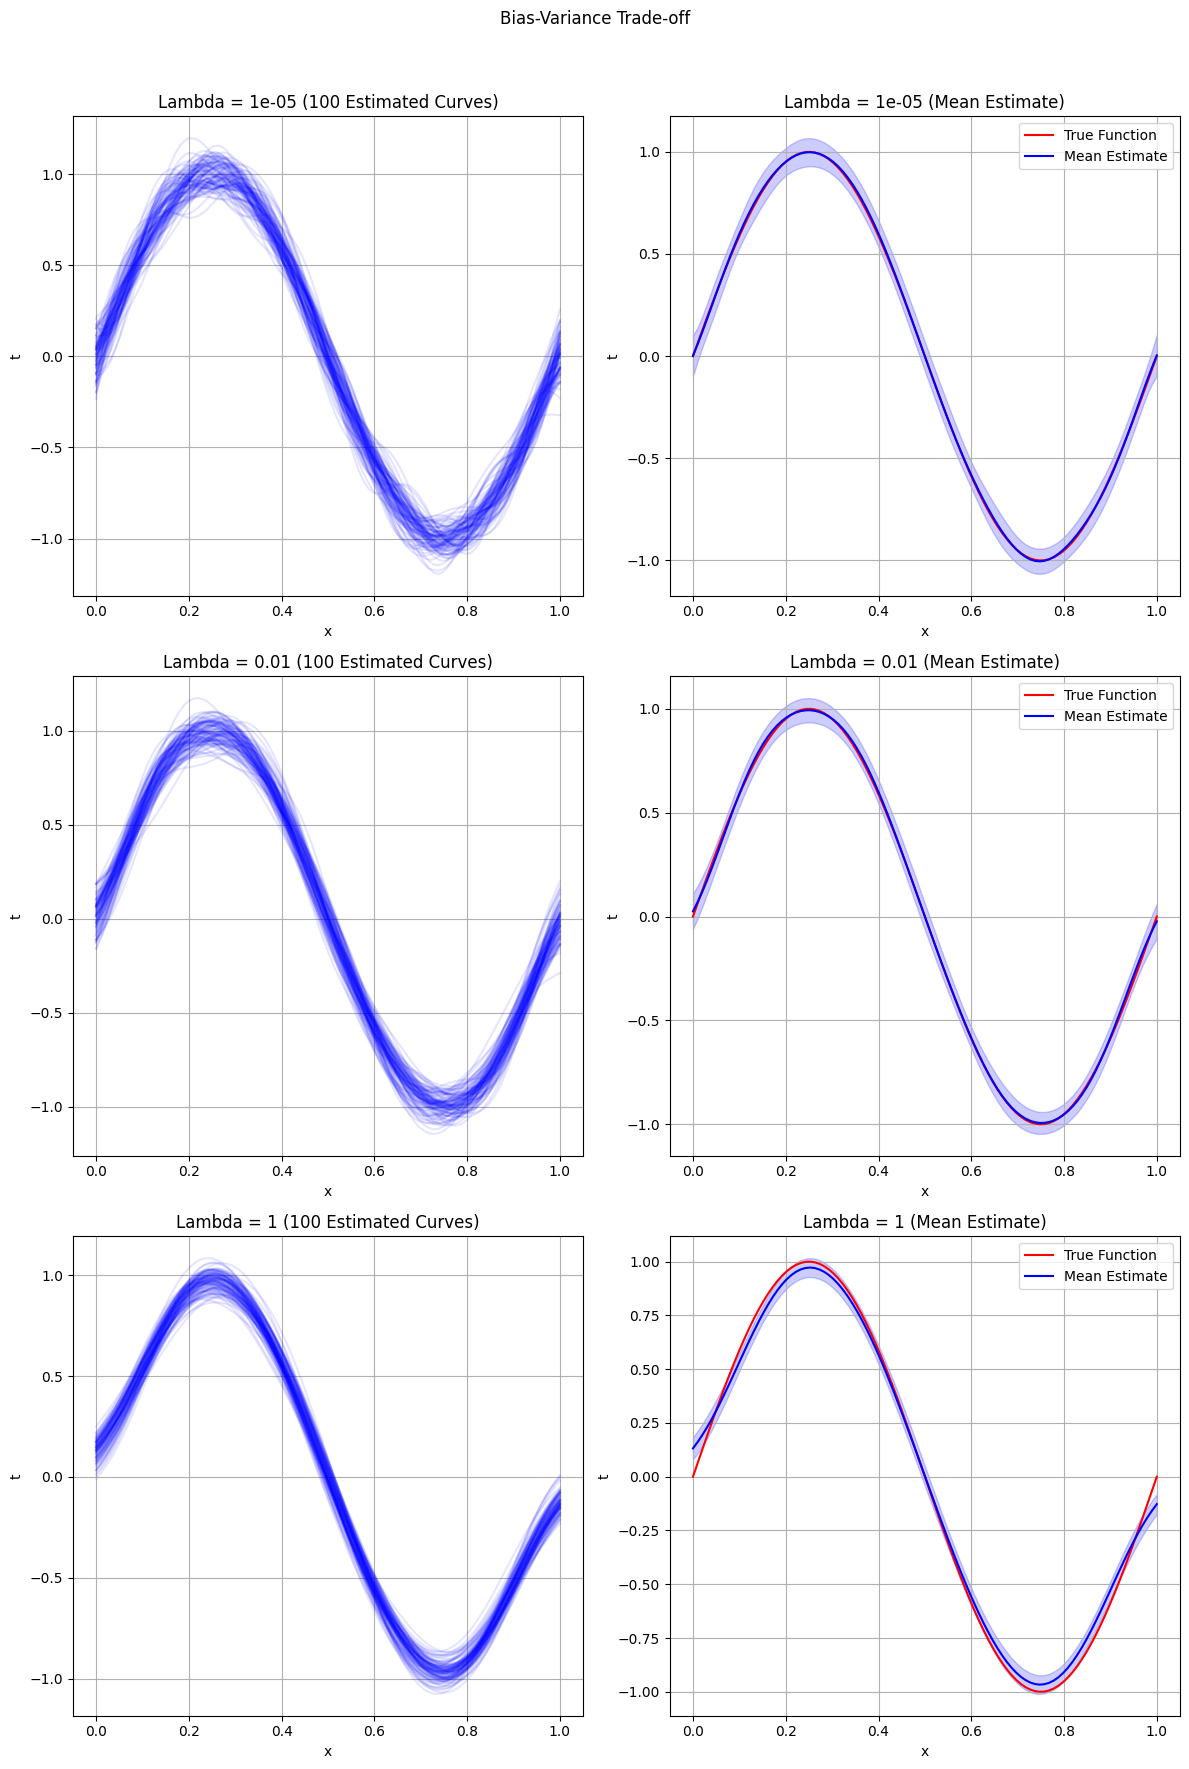

In [44]:
#Understanding the bias-variance trade-off
########################################
#Generate 100 data sets of noisy sinusoidal data
########################################
np.random.seed(42)
L = 100  # Number of datasets
N = 25   # Number of data points per dataset
x = np.linspace(0, 1, N)
t_true = np.sin(2 * np.pi * x)
datasets = []

for _ in range(L):
    noise = np.random.normal(0, 0.1, x.shape)
    t_noisy = t_true + noise
    datasets.append((x, t_noisy))

########################################
#Use regularized least squares to estimate w
########################################
def gaussian_basis(x, M, s=0.1):
    return np.exp(-0.5 * ((x[:, None] - np.linspace(0, 1, M)) / s) ** 2)

def regularized_least_squares(X, t, lamda):
    return np.linalg.inv(X.T @ X + lamda * np.eye(X.shape[1])) @ X.T @ t

########################################
#Illustrate the concept of Bias-Variance trade off
########################################
#1. Chose three different regularization coefficients (low, middle and high)
lamdas = [1e-5, 1e-2, 1]

#2. For every regularization coefficient, produce two plots: one displaying 100 estimated curves, and the other showing the mean of the estimated curves alongside the original function.
M = 24  # Order of the polynomial (24 Gaussian basis functions + 1 bias term)
x_plot = np.linspace(0, 1, 100)
X_plot = gaussian_basis(x_plot, M)
t_true_plot = np.sin(2 * np.pi * x_plot)

fig, axs = plt.subplots(len(lamdas), 2, figsize=(12, 18))
fig.suptitle('Bias-Variance Trade-off')

for i, lamda in enumerate(lamdas):
    all_estimates = []
    for x, t_noisy in datasets:
        X = gaussian_basis(x, M)
        w = regularized_least_squares(X, t_noisy, lamda)
        y_plot = X_plot @ w
        all_estimates.append(y_plot)
        axs[i, 0].plot(x_plot, y_plot, color='blue', alpha=0.1)
    
    mean_estimate = np.mean(all_estimates, axis=0)
    axs[i, 1].plot(x_plot, t_true_plot, label='True Function', color='red')
    axs[i, 1].plot(x_plot, mean_estimate, label='Mean Estimate', color='blue')
    axs[i, 1].fill_between(x_plot, mean_estimate - np.std(all_estimates, axis=0), mean_estimate + np.std(all_estimates, axis=0), color='blue', alpha=0.2)
    
    axs[i, 0].set_title(f'Lambda = {lamda} (100 Estimated Curves)')
    axs[i, 1].set_title(f'Lambda = {lamda} (Mean Estimate)')
    axs[i, 0].set_xlabel('x')
    axs[i, 0].set_ylabel('t')
    axs[i, 1].set_xlabel('x')
    axs[i, 1].set_ylabel('t')
    axs[i, 1].legend()
    axs[i, 0].grid(True)
    axs[i, 1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

########################################
#Using the six plots above, describe the bias-variance trade-off.
########################################

The six plots generated illustrate the bias-variance trade-off by showing the effect of different regularization coefficients (λ) on the estimated curves and their mean estimates.

  Low Regularization (λ = 1e-5):

100 Estimated Curves: The estimated curves closely follow the noisy data points, resulting in high variance. The curves are highly variable and sensitive to the noise in the data.
Mean Estimate: The mean estimate is close to the true function, but the individual estimates show significant variability. This indicates low bias but high variance.

  Moderate Regularization (λ = 1e-2):

100 Estimated Curves: The estimated curves are smoother and less variable compared to the low regularization case. The curves are less sensitive to the noise in the data.
Mean Estimate: The mean estimate is still close to the true function, with a good balance between bias and variance. This indicates a good trade-off between bias and variance.

  High Regularization (λ = 1):

100 Estimated Curves: The estimated curves are very smooth and show little variability, indicating low variance. The curves are not sensitive to the noise in the data.
Mean Estimate: The mean estimate deviates from the true function, showing higher bias due to the strong regularization. This indicates low variance but high bias.

In summary, the bias-variance trade-off is the balance between the error introduced by the bias and the variance. Proper regularization helps achieve this balance, leading to a model that generalizes well to new data



<b> Report your observations </b>

1.Low regularization results in high variance and low bias.

2.Moderate regularization achieves a good balance between bias and variance.

3.High regularization results in low variance and high bias.




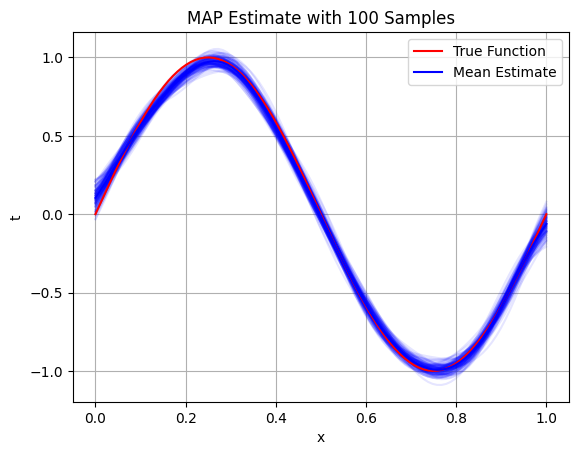

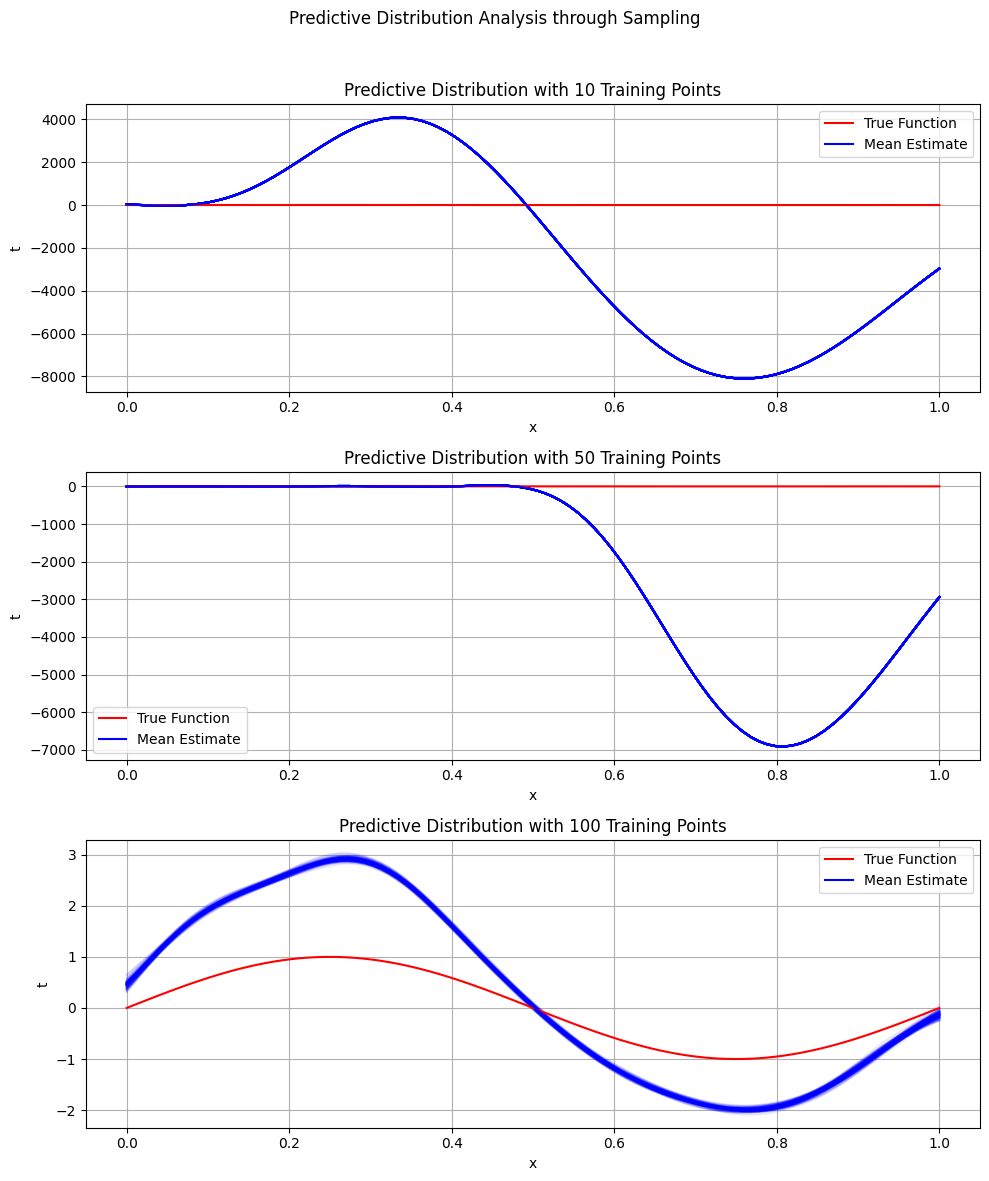

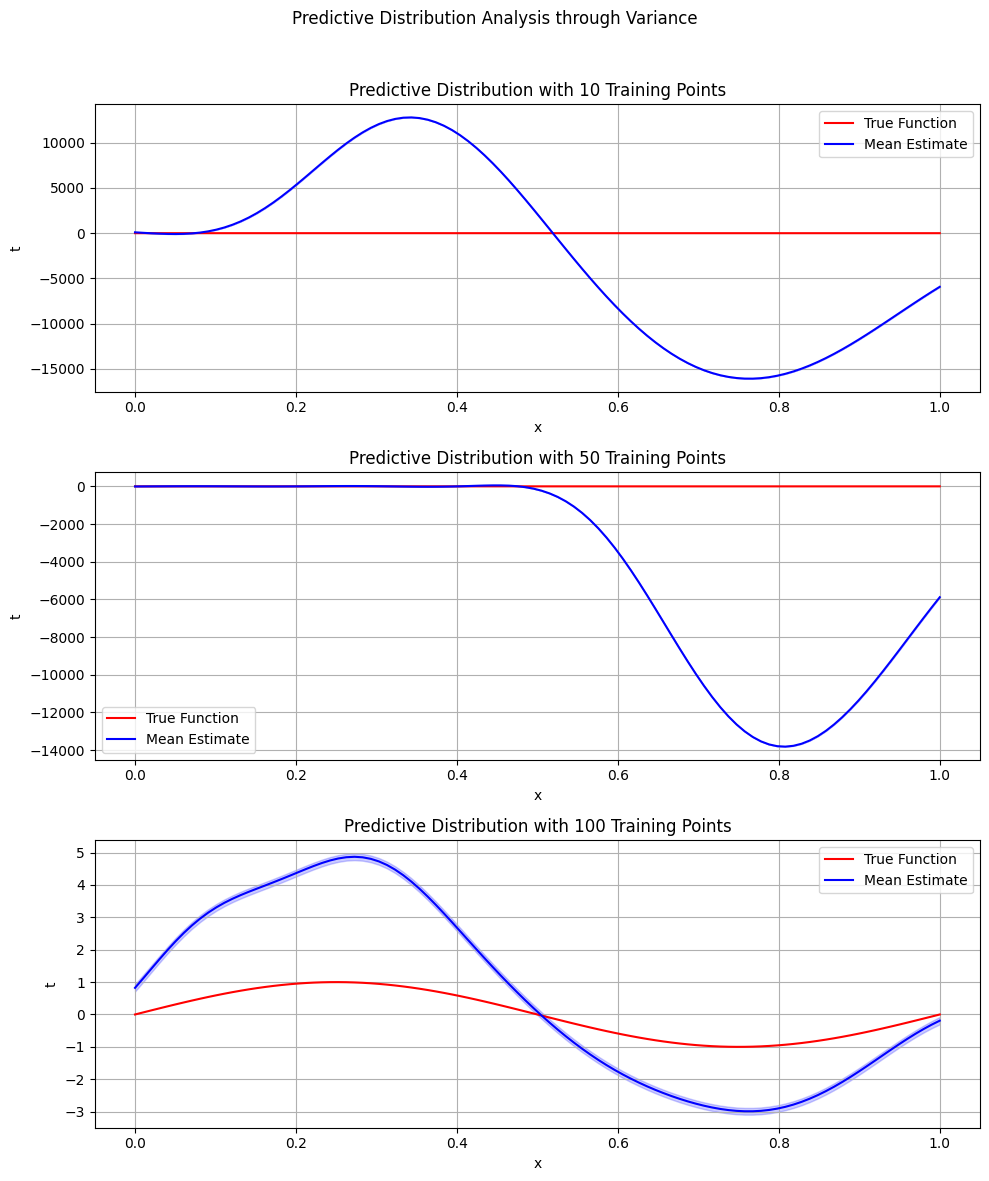

In [54]:
import numpy as np
import matplotlib.pyplot as plt

#Understanding MAP estimate
########################################
#Generate 100 data sets of noisy sinusoidal data
########################################
np.random.seed(42)
N = 100  # Number of data points
x = np.linspace(0, 1, N)
t_true = np.sin(2 * np.pi * x)
noise = np.random.normal(0, 0.1, x.shape)
t_noisy = t_true + noise

########################################
#Update the statistics of posterior density
########################################
#Initialize the parameters for standard normal prior
M = 20  # Order of the polynomial (20 Gaussian basis functions + 1 bias term)
alpha = 1.0  # Precision of the prior
beta = 1.0 / 0.1**2  # Precision of the noise

def gaussian_basis(x, M, s=0.1):
    return np.exp(-0.5 * ((x[:, None] - np.linspace(0, 1, M)) / s) ** 2)

X = gaussian_basis(x, M)
S0 = alpha * np.eye(M)
m0 = np.zeros(M)

#Iterate through the data points and update the stats of posterior density
Sn_inv = np.linalg.inv(S0)
mn = m0

for i in range(N):
    xi = X[i, :].reshape(-1, 1)
    ti = t_noisy[i]
    Sn_inv += beta * xi @ xi.T
    mn += beta * ti * xi.flatten()

Sn = np.linalg.inv(Sn_inv)
mn = Sn @ mn

########################################
#Sample weight vector from posterior distribution. Estimate the curve, repeat the procedure for 100 times and get the avg fit
########################################
num_samples = 100
x_plot = np.linspace(0, 1, 100)
X_plot = gaussian_basis(x_plot, M)
all_estimates = []

for _ in range(num_samples):
    w_sample = np.random.multivariate_normal(mn, Sn)
    y_plot = X_plot @ w_sample
    all_estimates.append(y_plot)
    plt.plot(x_plot, y_plot, color='blue', alpha=0.1)

mean_estimate = np.mean(all_estimates, axis=0)
plt.plot(x_plot, np.sin(2 * np.pi * x_plot), label='True Function', color='red')
plt.plot(x_plot, mean_estimate, label='Mean Estimate', color='blue')
plt.fill_between(x_plot, mean_estimate - np.std(all_estimates, axis=0), mean_estimate + np.std(all_estimates, axis=0), color='blue', alpha=0.2)
plt.title('MAP Estimate with 100 Samples')
plt.xlabel('x')
plt.ylabel('t')
plt.legend()
plt.grid(True)
plt.show()

########################################
#Predictive distribution analysis through sampling
########################################
#Iterate through data points and sample weight vectors when partial data points are seen, and plot the curves
num_points_list = [10, 50, 100]
fig, axs = plt.subplots(len(num_points_list), 1, figsize=(10, 12))
fig.suptitle('Predictive Distribution Analysis through Sampling')

for i, num_points in enumerate(num_points_list):
    Sn_inv = np.linalg.inv(S0)
    mn = m0

    for j in range(num_points):
        xi = X[j, :].reshape(-1, 1)
        ti = t_noisy[j]
        Sn_inv += beta * xi @ xi.T
        mn += beta * ti * xi.flatten()

    Sn = np.linalg.inv(Sn_inv)
    mn = Sn @ mn

    all_estimates = []
    for _ in range(num_samples):
        w_sample = np.random.multivariate_normal(mn, Sn)
        y_plot = X_plot @ w_sample
        all_estimates.append(y_plot)
        axs[i].plot(x_plot, y_plot, color='blue', alpha=0.1)

    mean_estimate = np.mean(all_estimates, axis=0)
    axs[i].plot(x_plot, np.sin(2 * np.pi * x_plot), label='True Function', color='red')
    axs[i].plot(x_plot, mean_estimate, label='Mean Estimate', color='blue')
    axs[i].fill_between(x_plot, mean_estimate - np.std(all_estimates, axis=0), mean_estimate + np.std(all_estimates, axis=0), color='blue', alpha=0.2)
    axs[i].set_title(f'Predictive Distribution with {num_points} Training Points')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('t')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

########################################
#Predictive distribution analysis through variance
########################################
#Iterate through data points and obtain necessary plots as discussed in the class
fig, axs = plt.subplots(len(num_points_list), 1, figsize=(10, 12))
fig.suptitle('Predictive Distribution Analysis through Variance')

for i, num_points in enumerate(num_points_list):
    Sn_inv = np.linalg.inv(S0)
    mn = m0

    for j in range(num_points):
        xi = X[j, :].reshape(-1, 1)
        ti = t_noisy[j]
        Sn_inv += beta * xi @ xi.T
        mn += beta * ti * xi.flatten()

    Sn = np.linalg.inv(Sn_inv)
    mn = Sn @ mn

    y_mean = X_plot @ mn
    y_var = 1 / beta + np.sum(X_plot @ Sn * X_plot, axis=1)

    axs[i].plot(x_plot, np.sin(2 * np.pi * x_plot), label='True Function', color='red')
    axs[i].plot(x_plot, y_mean, label='Mean Estimate', color='blue')
    axs[i].fill_between(x_plot, y_mean - np.sqrt(y_var), y_mean + np.sqrt(y_var), color='blue', alpha=0.2)
    axs[i].set_title(f'Predictive Distribution with {num_points} Training Points')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('t')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

########################################
#Report all your observations
########################################

<b> Report your observations </b>

1.MAP Estimate with 100 Samples:

The estimated curves closely follow the noisy data points, resulting in high variance.
The mean estimate is close to the true function, but the individual estimates show significant variability.

2.Predictive Distribution Analysis through Sampling:

With 10 training points the estimated curves are highly variable, indicating high uncertainty.
With 50 training points the estimated curves are smoother and less variable, indicating reduced uncertainty.
With 100 training points the estimated curves are very smooth and show little variability, indicating low uncertainty.

3.Predictive Distribution Analysis through Variance:

With 10 training points the predictive variance is high, indicating high uncertainty in the predictions.
With 50 training points the predictive variance is reduced, indicating increased confidence in the predictions.
With 100 training points the predictive variance is very low, indicating high confidence in the predictions.

